In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl

In [2]:
class_mapping = {}
with open('dbpedia_csv/classes.txt') as txt_file:
    line_num = 1
    for line in txt_file:
        class_mapping[line_num-1] = line.strip()
        line_num+=1
        
print(class_mapping)

{0: 'Company', 1: 'EducationalInstitution', 2: 'Artist', 3: 'Athlete', 4: 'OfficeHolder', 5: 'MeanOfTransportation', 6: 'Building', 7: 'NaturalPlace', 8: 'Village', 9: 'Animal', 10: 'Plant', 11: 'Album', 12: 'Film', 13: 'WrittenWork'}


In [3]:
def fill_missing(accuracies):
    for item in accuracies.keys():
        for i in range(len(accuracies[item])):
            if np.isnan(accuracies[item][i]):
                if i> len(accuracies[item])-10:
                    accuracies[item][i] = accuracies[item][i-11]
                else:
                    accuracies[item][i] = impute_missing(accuracies, item, i)
                    
def impute_missing(accuracies, item, i):
    if i == 0:
        return(accuracies[item][i+1])
    if i == len(accuracies[item])-1:
        return(accuracies[item][i-3])
    else:
        if np.isnan(accuracies[item][i-1]):
            accuracies[item][i-1] = impute_missing(accuracies,item,i-1)
        if np.isnan(accuracies[item][i+1]):
            accuracies[item][i+1] = impute_missing(accuracies,item,i+1)
        return((accuracies[item][i-1]+accuracies[item][i+1])/2)

# Doc2Vec

In [4]:
name = 'Doc2Vec/Sequential_3Doc2VecAccuracy'
accs = pkl.load(open(name, 'rb'))
accuracies = pd.DataFrame([accs[key] for key in accs.keys()]).rename(index = class_mapping)
accuracies = accuracies.reindex(sorted(list(accuracies.columns), key = int), axis = 1).transpose()
accuracies['Total Accuracy'] = accuracies.sum(axis=1)/14
accuracies['Number of Words'] = accuracies.index.astype(int)
Doc2Vec_accs = accuracies
accuracies.isna().sum()

Company                   0
EducationalInstitution    0
Artist                    0
Athlete                   0
OfficeHolder              0
MeanOfTransportation      0
Building                  0
NaturalPlace              0
Village                   0
Animal                    0
Plant                     0
Album                     0
Film                      0
WrittenWork               0
Total Accuracy            0
Number of Words           0
dtype: int64

In [5]:
for key1 in accs.keys():
    for key2 in accs[key1].keys():
        print("{}:\tSentence length: {}\tAccuracy: {}".format(key1,key2,accs[key1][key2]))

Company:	Sentence length: 1	Accuracy: 0.0006
Company:	Sentence length: 2	Accuracy: 0.027
Company:	Sentence length: 3	Accuracy: 0.0724
Company:	Sentence length: 4	Accuracy: 0.15203040608121624
Company:	Sentence length: 5	Accuracy: 0.24584584584584585
Company:	Sentence length: 6	Accuracy: 0.32625675946324856
Company:	Sentence length: 7	Accuracy: 0.37707874173512324
Company:	Sentence length: 8	Accuracy: 0.4162324649298597
Company:	Sentence length: 9	Accuracy: 0.456386605173451
Company:	Sentence length: 10	Accuracy: 0.502408671216379
Company:	Sentence length: 11	Accuracy: 0.5417253167102353
Company:	Sentence length: 12	Accuracy: 0.581484469544171
Company:	Sentence length: 13	Accuracy: 0.6056737588652482
Company:	Sentence length: 14	Accuracy: 0.6386913229018493
Company:	Sentence length: 15	Accuracy: 0.6625178534992858
Company:	Sentence length: 16	Accuracy: 0.6813141683778234
Company:	Sentence length: 17	Accuracy: 0.6947194719471947
Company:	Sentence length: 18	Accuracy: 0.7122062798918695
C

WrittenWork:	Sentence length: 10	Accuracy: 0.8646147656407162
WrittenWork:	Sentence length: 11	Accuracy: 0.8761578735400725
WrittenWork:	Sentence length: 12	Accuracy: 0.9167510633988252
WrittenWork:	Sentence length: 13	Accuracy: 0.9189024390243903
WrittenWork:	Sentence length: 14	Accuracy: 0.9234834073134643
WrittenWork:	Sentence length: 15	Accuracy: 0.9407598197037991
WrittenWork:	Sentence length: 16	Accuracy: 0.9444444444444444
WrittenWork:	Sentence length: 17	Accuracy: 0.9453037435552567
WrittenWork:	Sentence length: 18	Accuracy: 0.9551122194513716
WrittenWork:	Sentence length: 19	Accuracy: 0.9551963048498845
WrittenWork:	Sentence length: 20	Accuracy: 0.965460910151692
WrittenWork:	Sentence length: 21	Accuracy: 0.9638297872340426
WrittenWork:	Sentence length: 22	Accuracy: 0.9653453596012342
WrittenWork:	Sentence length: 23	Accuracy: 0.9706793802145411
WrittenWork:	Sentence length: 24	Accuracy: 0.9687347337567171
WrittenWork:	Sentence length: 25	Accuracy: 0.9630940343781598
WrittenWo

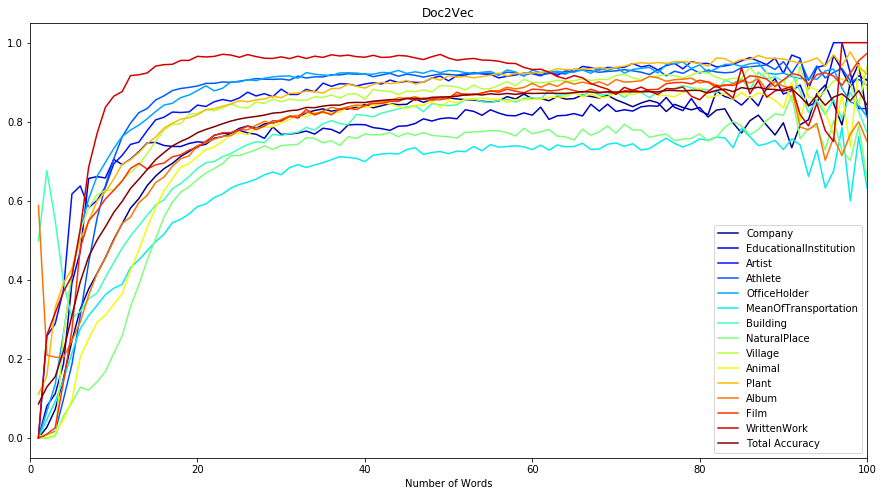

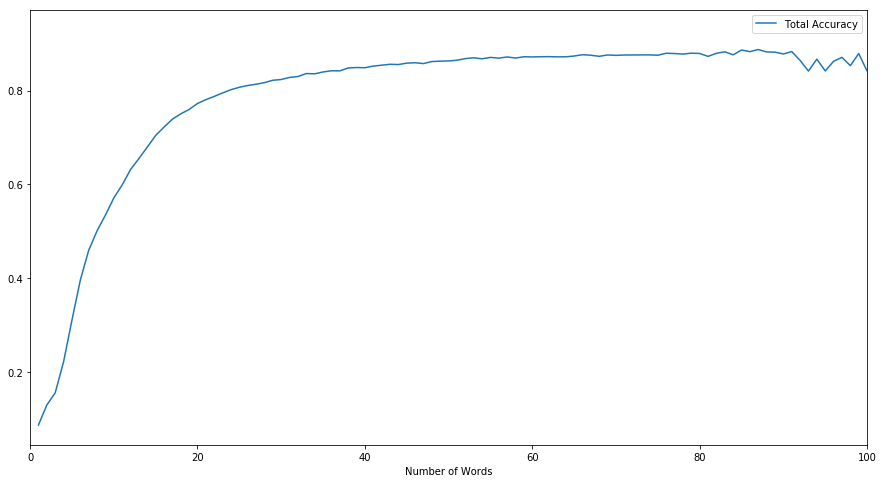

In [6]:
Doc2Vec_accs.plot(x ='Number of Words', figsize = (15,8), xlim=(0,100), colormap = 'jet')
plt.title('Doc2Vec')
plt.show()
Doc2Vec_accs.plot(x = 'Number of Words', y = 'Total Accuracy', figsize = (15,8), xlim=(0,100))
plt.show()

# Tf Idf

In [7]:
name = 'TfIdf/Accuracy'
accs = pkl.load(open(name, 'rb'))
accuracies = pd.DataFrame([accs[key] for key in accs.keys()]).rename(index = class_mapping)
accuracies = accuracies.reindex(sorted(list(accuracies.columns), key = int), axis = 1).transpose()
accuracies['Total Accuracy'] = accuracies.sum(axis=1)/14
accuracies['Number of Words'] = accuracies.index.astype(int)
TfIdf_accs = accuracies
accuracies.isna().sum()

Company                   0
EducationalInstitution    0
Artist                    0
Athlete                   0
OfficeHolder              0
MeanOfTransportation      0
Building                  0
NaturalPlace              0
Village                   0
Animal                    0
Plant                     0
Album                     0
Film                      0
WrittenWork               3
Total Accuracy            0
Number of Words           0
dtype: int64

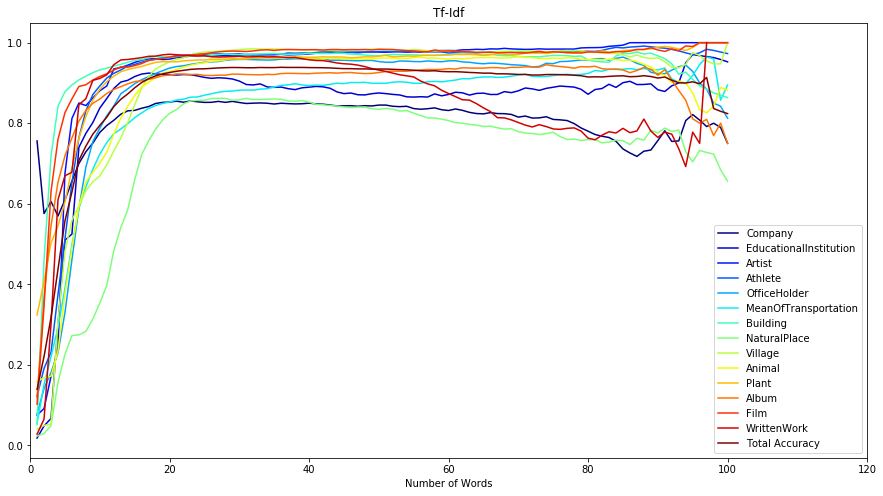

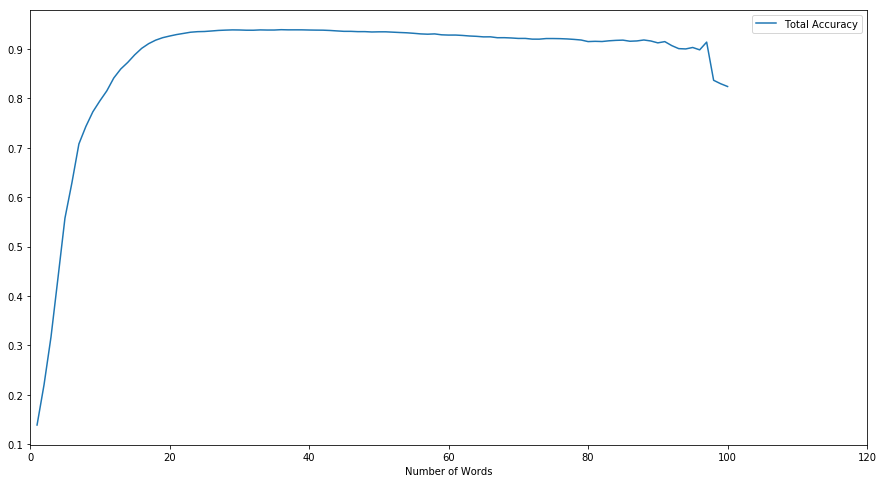

In [8]:
TfIdf_accs.plot(x ='Number of Words', figsize = (15,8), xlim=(0,120), colormap = 'jet')
plt.title('Tf-Idf')
plt.show()
TfIdf_accs.plot(x = 'Number of Words', y = 'Total Accuracy', figsize = (15,8), xlim=(0,120))
plt.show()

# Universal Sentence Encoder

In [9]:
name = 'UniversalSentenceEncoder/USEaccuracy'
accs = pkl.load(open(name, 'rb'))
accuracies = pd.DataFrame([accs[key] for key in accs.keys()]).rename(index = class_mapping)
accuracies = accuracies.reindex(sorted(list(accuracies.columns), key = int), axis = 1).transpose()
fill_missing(accuracies)
accuracies['Total Accuracy'] = accuracies.sum(axis=1)/14
accuracies['Number of Words'] = accuracies.index.astype(int)
USE_accs = accuracies
accuracies.isna().sum()

Company                   0
EducationalInstitution    0
Artist                    0
Athlete                   0
OfficeHolder              0
MeanOfTransportation      0
Building                  0
NaturalPlace              0
Village                   0
Animal                    0
Plant                     0
Album                     0
Film                      0
WrittenWork               0
Total Accuracy            0
Number of Words           0
dtype: int64

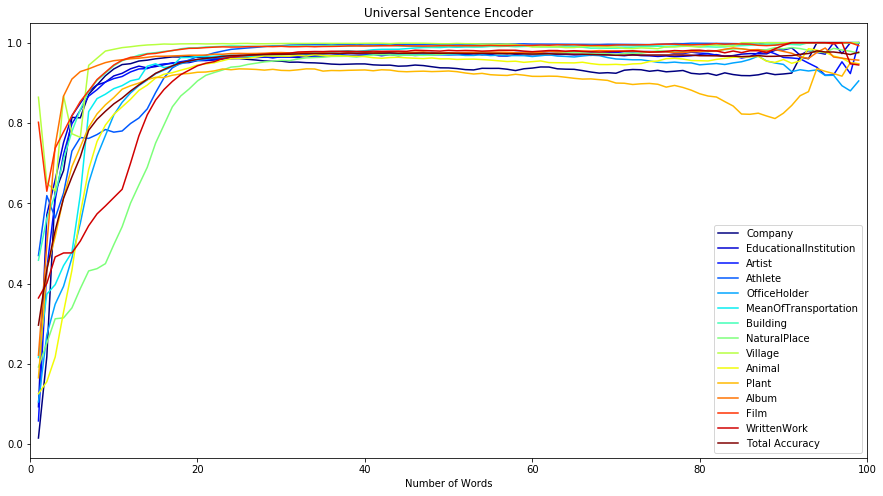

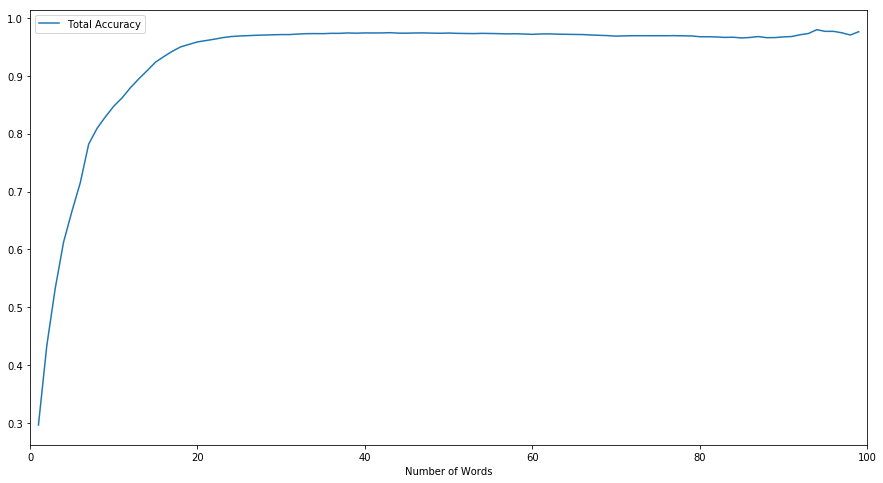

In [10]:
USE_accs.plot(x ='Number of Words', figsize = (15,8), xlim=(0,100), colormap = 'jet')
plt.title('Universal Sentence Encoder')
plt.show()
USE_accs.plot(x = 'Number of Words', y = 'Total Accuracy', figsize = (15,8), xlim=(0,100))
plt.show()

# Doc2Vec paragraph, FastText word

In [11]:
name = 'Doc2Vec_FastText/Doc2Vec_FastText_Accuracy'
accs = pkl.load(open(name, 'rb'))
accuracies = pd.DataFrame([accs[key] for key in accs.keys()]).rename(index = class_mapping)
accuracies = accuracies.reindex(sorted(list(accuracies.columns), key = int), axis = 1).transpose()
accuracies['Total Accuracy'] = accuracies.sum(axis=1)/14
accuracies['Number of Words'] = accuracies.index.astype(int)
Doc2Vec_FastText_accs = accuracies
accuracies.isna().sum()

Company                   0
EducationalInstitution    0
Artist                    0
Athlete                   0
OfficeHolder              0
MeanOfTransportation      0
Building                  0
NaturalPlace              0
Village                   0
Animal                    0
Plant                     0
Album                     0
Film                      0
WrittenWork               2
Total Accuracy            0
Number of Words           0
dtype: int64

In [12]:
Doc2Vec_FastText_accs

,Company,EducationalInstitution,Artist,Athlete,OfficeHolder,MeanOfTransportation,Building,NaturalPlace,Village,Animal,Plant,Album,Film,WrittenWork,Total Accuracy,Number of Words
1,0.145800,0.654400,0.707400,0.240400,0.168800,0.095000,0.148600,0.061800,0.279400,0.484600,0.866400,0.237800,0.139400,0.546600,0.341171,1
2,0.347400,0.393600,0.615600,0.333600,0.139000,0.185600,0.510400,0.056400,0.230800,0.401200,0.308000,0.424600,0.263400,0.407000,0.329757,2
3,0.317000,0.139600,0.418200,0.389400,0.191200,0.198600,0.569800,0.054400,0.433400,0.296800,0.372400,0.419200,0.325800,0.513200,0.331357,3
4,0.324665,0.231800,0.548000,0.440288,0.319000,0.236400,0.381553,0.071857,0.438463,0.234247,0.349800,0.342800,0.235600,0.674600,0.344934,4
5,0.407207,0.435200,0.726545,0.526505,0.420600,0.342200,0.281513,0.112690,0.488293,0.289658,0.399600,0.274000,0.363400,0.434600,0.393001,5
6,0.502303,0.571400,0.751750,0.618324,0.511200,0.450800,0.353141,0.144516,0.542726,0.328797,0.517600,0.292800,0.571800,0.571200,0.480597,6
7,0.563013,0.704600,0.812963,0.687938,0.585385,0.525000,0.446668,0.171938,0.587187,0.365619,0.601800,0.358800,0.623400,0.725600,0.554279,7
8,0.567535,0.673874,0.747394,0.725090,0.635525,0.566513,0.504903,0.170477,0.635636,0.386109,0.674400,0.392000,0.635398,0.769277,0.577438,8
9,0.576699,0.659831,0.745964,0.769277,0.673293,0.572802,0.554333,0.203938,0.653576,0.388455,0.704341,0.418684,0.658178,0.828617,0.600571,9
10,0.588117,0.714372,0.805572,0.798034,0.680654,0.585474,0.578147,0.255547,0.650020,0.408699,0.731039,0.425126,0.675064,0.869242,0.626079,10


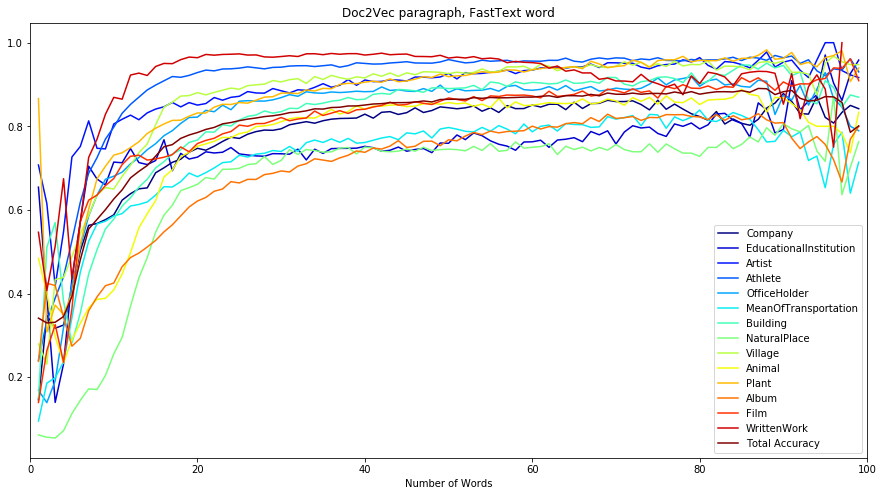

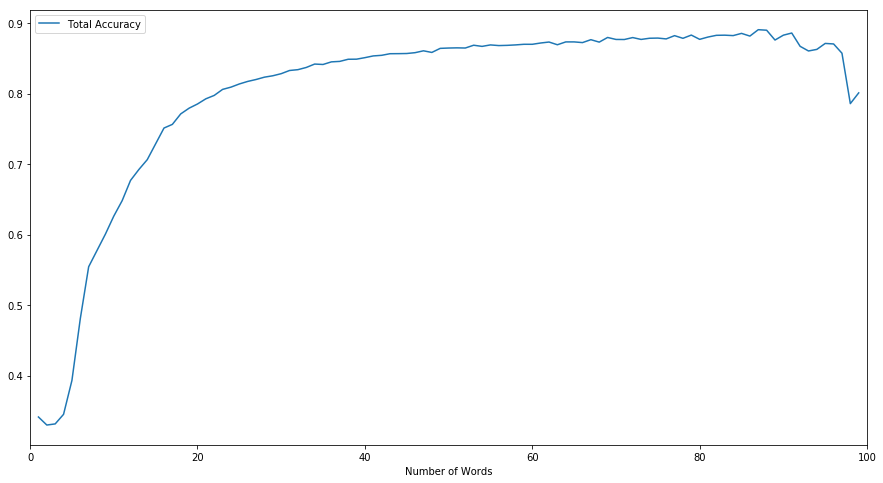

In [13]:
Doc2Vec_FastText_accs.plot(x ='Number of Words', figsize = (15,8), xlim=(0,100), colormap = 'jet')
plt.title('Doc2Vec paragraph, FastText word')
plt.show()
Doc2Vec_FastText_accs.plot(x = 'Number of Words', y = 'Total Accuracy', figsize = (15,8), xlim=(0,100))
plt.show()

In [14]:
name = 'USE_Doc2Vec/USEparagraph_Doc2Vecsentence_accuracy'
accs = pkl.load(open(name, 'rb'))
accuracies = pd.DataFrame([accs[key] for key in accs.keys()]).rename(index = class_mapping)
accuracies = accuracies.reindex(sorted(list(accuracies.columns), key = int), axis = 1).transpose()
fill_missing(accuracies)
accuracies['Total Accuracy'] = accuracies.sum(axis=1)/14
accuracies['Number of Words'] = accuracies.index.astype(int)
USE_Doc2Vec_accs = accuracies
accuracies.isna().sum()

Company                   0
EducationalInstitution    0
Artist                    0
Athlete                   0
OfficeHolder              0
MeanOfTransportation      0
Building                  0
NaturalPlace              0
Village                   0
Animal                    0
Plant                     0
Album                     0
Film                      0
WrittenWork               0
Total Accuracy            0
Number of Words           0
dtype: int64

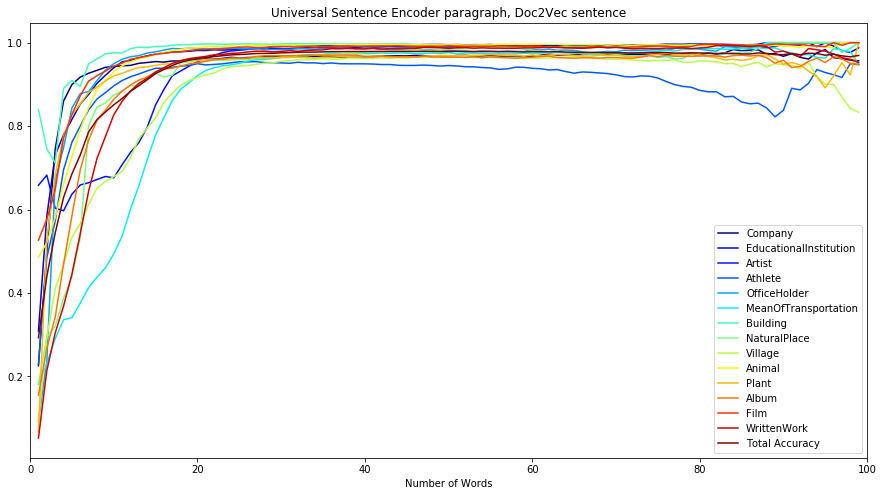

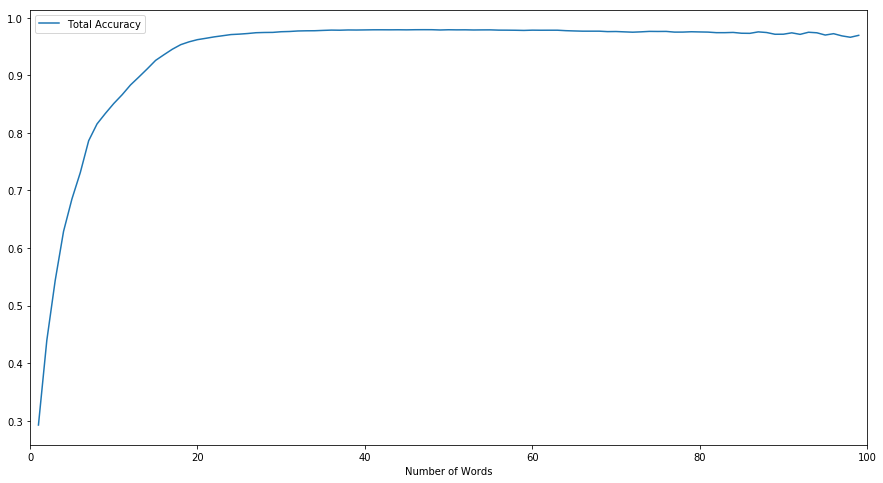

In [15]:
USE_Doc2Vec_accs.plot(x ='Number of Words', figsize = (15,8), xlim=(0,100), colormap = 'jet')
plt.title('Universal Sentence Encoder paragraph, Doc2Vec sentence')
plt.show()
USE_Doc2Vec_accs.plot(x = 'Number of Words', y = 'Total Accuracy', figsize = (15,8), xlim=(0,100))
plt.show()

# Combined

In [16]:
all_accs = pd.DataFrame([Doc2Vec_accs['Total Accuracy'][:100], TfIdf_accs['Total Accuracy'][:100], USE_accs['Total Accuracy'][:100], Doc2Vec_FastText_accs['Total Accuracy'][:100], USE_Doc2Vec_accs['Total Accuracy'][:100]],
                        index = ['Doc2Vec', 'TfIdf', 'USE', 'Doc2Vec_FastText', 'USE_Doc2Vec'])

In [ ]:
all_accs.index

In [ ]:
all_accs.loc['Doc2Vec'][87]

In [17]:
max_accs = pd.DataFrame([(y,int(x),all_accs.loc[y][x]) for x,y in zip(all_accs.idxmax(axis=1),all_accs.index)], columns=['Method','Word','Accuracy'])
max_accs.set_index('Method', inplace=True)

In [19]:
def highlight_min(s):
    is_min = s == s.min()
    return['background-color:salmon' if v else '' for v in is_min]
def highlight_max(s):
    is_max = s == s.max()
    return['background-color:lightgreen' if v else '' for v in is_max]
max_accs.style.apply(highlight_min).apply(highlight_max)

,Word,Accuracy
Method,,
Doc2Vec,87,0.887392
TfIdf,36,0.938836
USE,94,0.979702
Doc2Vec_FastText,87,0.890567
USE_Doc2Vec,47,0.979256


In [ ]:
plt.figure(figsize = (15,8))
ax = plt.subplot(111)
plt.plot(all_accs.T)
ax.legend(['Doc2Vec', 'Tf-Idf', 'USE', 'Doc2Vec FastText', 'USE Doc2Vec'], fontsize = 12)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_facecolor('lightgrey')
ax.patch.set_alpha(0.8)
plt.xticks(range(0, 101, 10), [x for x in range(0, 101, 10)], fontsize=10)
plt.yticks(fontsize = 10)
plt.ylabel('Accuracy', fontsize = 12)
plt.xlabel('# Words', fontsize = 12)
for y in np.linspace(0, 1, 11):
    plt.plot(range(0,101), [y] * len(range(0, 101)), "--", lw=.75, color = 'w')
plt.tick_params(axis="both", which="both", bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)
plt.title('Overall Accuracy', fontsize = 14)
plt.show()

In [ ]:
def plot_category(category):
    all_category = pd.DataFrame([Doc2Vec_accs[category][:100], TfIdf_accs[category][:100], USE_accs[category][:100], Doc2Vec_FastText_accs[category][:100], USE_Doc2Vec_accs[category][:100]],
                        index = ['Doc2Vec', 'TfIdf', 'USE', 'Doc2Vec_FastText', 'USE_Doc2Vec'])
    plt.figure(figsize = (15,8))
    ax = plt.subplot(111)
    plt.plot(all_category.T)
    ax.legend(['Doc2Vec', 'Tf-Idf', 'USE', 'Doc2Vec FastText', 'USE Doc2Vec'], fontsize = 12)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_facecolor('lightgrey')
    ax.patch.set_alpha(0.8)
    plt.xticks(range(0, 101, 10), [x for x in range(0, 101, 10)], fontsize=10)
    plt.yticks(fontsize = 10)
    plt.ylabel('Accuracy', fontsize = 12)
    plt.xlabel('# Words', fontsize = 12)
    for y in np.linspace(0, 1, 11):
        plt.plot(range(0,101), [y] * len(range(0, 101)), "--", lw=.75, color = 'w')
    plt.tick_params(axis="both", which="both", bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=False)
    plt.title(category, fontsize = 14)
    plt.show()

In [ ]:
for key in class_mapping.keys():
    plot_category(class_mapping[key])